



#**Random Forest**





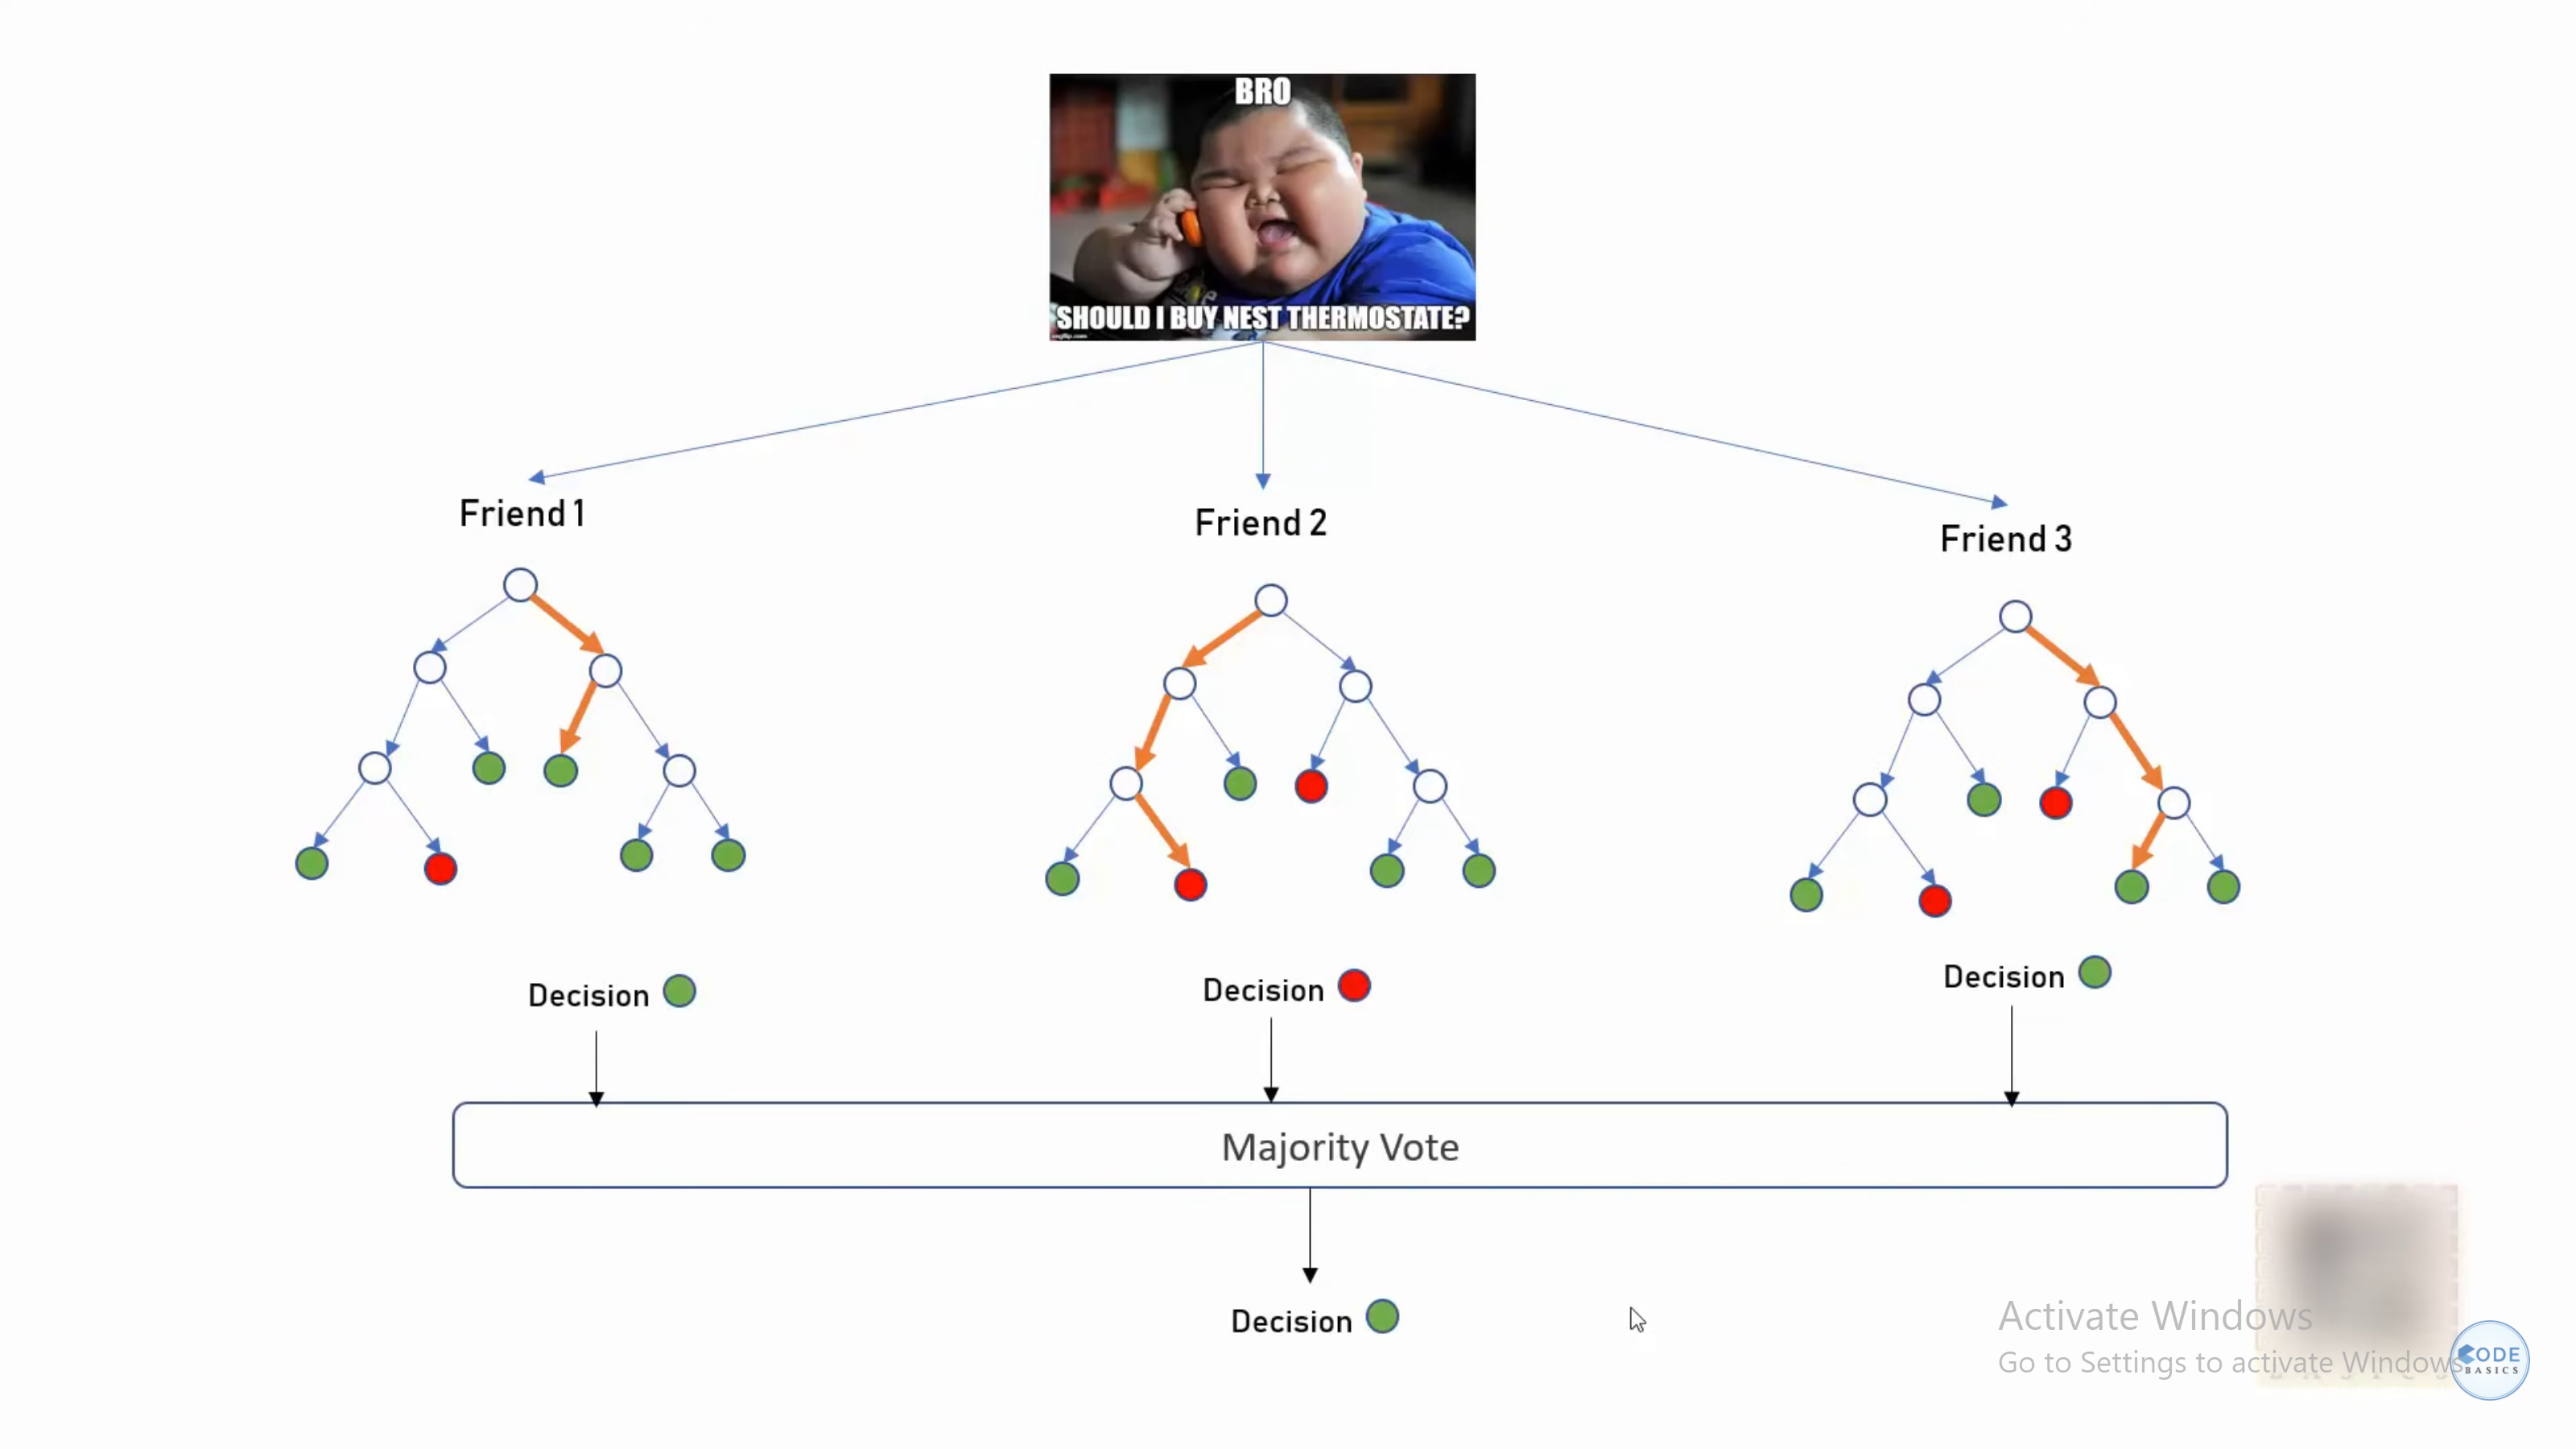

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2)

In [10]:
len(X_train)

1437

In [11]:
len(X_test)

360

ensamble : Istilah yang digunakan ketika menggunakna beberapa algoritma untuk memprediksi hasilnya

In [13]:
from sklearn.ensemble import RandomForestClassifier


In [16]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)
#0.9694444444444444

0.9694444444444444

In [ ]:
help(model) #check parameter yang bisa digunakan

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)
#0.9638888888888889

0.9611111111111111

In [21]:
y_predicted = model.predict(X_test)

# **Confussion Matriks**

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 46,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1, 35,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  3, 30]])

Text(95.72222222222221, 0.5, 'Truth')

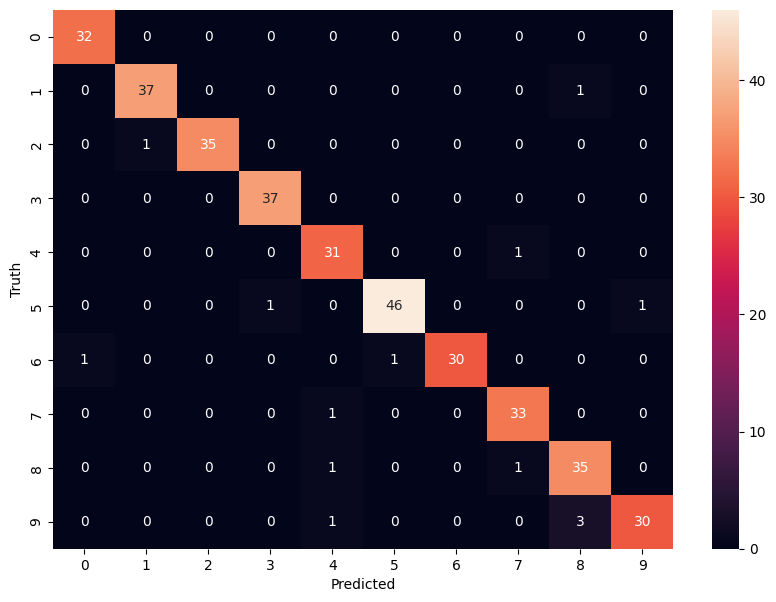

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **EXERCISE**

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

1. Measure prediction score using default n_estimators (10)
1. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees



---
Gunakan kumpulan data bunga iris terkenal dari sklearn.datasets untuk memprediksi spesies bunga menggunakan pengklasifikasi hutan acak.

1. Ukur skor prediksi menggunakan n_estimators default (10)
1. Sekarang perbaiki model Anda dengan mengubah jumlah pohon di pengklasifikasi Anda dan beri tahu saya skor terbaik yang bisa Anda dapatkan menggunakan berapa banyak pohon


In [24]:
from sklearn.datasets import load_iris
iris = load_iris()

In [25]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [33]:
from sklearn.ensemble import RandomForestClassifier


In [58]:
model_default = RandomForestClassifier()
model_default.fit(X_train, y_train)
model_default.score(X_test, y_test)
#0.9

0.9

In [59]:
model_default = RandomForestClassifier(n_estimators=10)
model_default.fit(X_train, y_train)
model_default.score(X_test, y_test)
#0.9

0.9

In [60]:
model_default = RandomForestClassifier(n_estimators=100)
model_default.fit(X_train, y_train)
model_default.score(X_test, y_test)
#0.9

0.8666666666666667

In [51]:
model_default = RandomForestClassifier(n_jobs=100)
model_default.fit(X_train, y_train)
model_default.score(X_test, y_test)
#0.8666666666666667

0.9

In [74]:
model_default = RandomForestClassifier(n_estimators=60)
model_default.fit(X_train, y_train)
model_default.score(X_test, y_test)

0.9